In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

* ### Carregando os dados

In [3]:
data=pd.read_csv('/content/credit_record.csv')
df=pd.read_csv('/content/application_record.csv')
data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
df.drop(columns=['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],inplace=True)

In [5]:
df.columns=['ID','sexo','posse_carro','posse_casa','qtd_filho','tipo_renda','categoria_renda','educacao','estado_civil','modo_viver','aniversario','inicio_emprego','ocupacao','qtd_familia']

In [6]:
df.head()

,ID,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,categoria_renda,educacao,estado_civil,modo_viver,aniversario,inicio_emprego,ocupacao,qtd_familia
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,Sales staff,1.0


### **Tarefa 01 - Gráficos de barras**

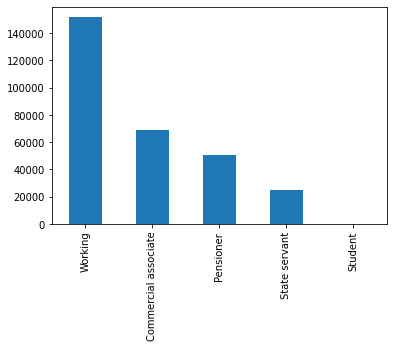

In [38]:
df['categoria_renda'].value_counts().plot.bar()

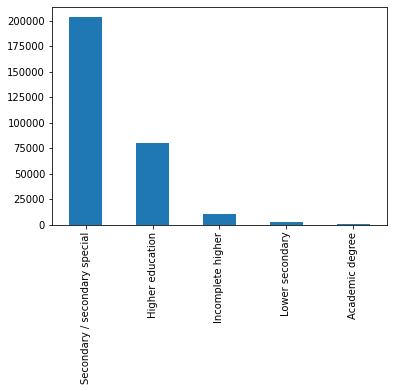

In [41]:
df['educacao'].value_counts().plot.bar()

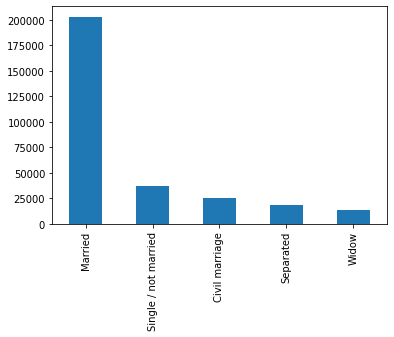

In [40]:
df['estado_civil'].value_counts().plot.bar()

In [7]:
df['idade']=df['aniversario']//365*-1
df['tempo_emprego']=df['inicio_emprego']//365*-1
df2=df.drop(columns=['aniversario','inicio_emprego'],axis=1)

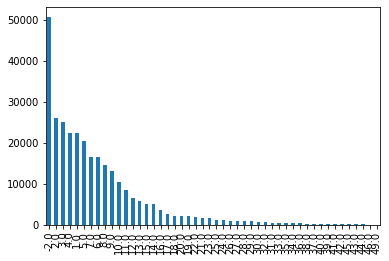

In [8]:
df2['tempo_emprego']=df2['tempo_emprego'].replace(-1000,-2)
df2['tempo_emprego'].value_counts().plot.bar()

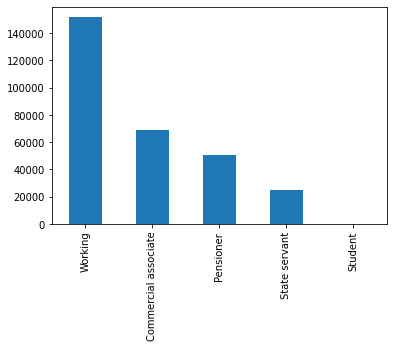

In [10]:
df2['categoria_renda'].value_counts().plot.bar()

In [11]:
df2['educacao'].value_counts()

Secondary / secondary special    203224
Higher education                  79976
Incomplete higher                  9894
Lower secondary                    2828
Academic degree                     203
Name: educacao, dtype: int64

In [12]:
df2['estado_civil'].value_counts()

Married                 203001
Single / not married     37090
Civil marriage           24834
Separated                18077
Widow                    13123
Name: estado_civil, dtype: int64

In [13]:
df2.head()

,ID,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,categoria_renda,educacao,estado_civil,modo_viver,ocupacao,qtd_familia,idade,tempo_emprego
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,13.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,NaN,2.0,33.0,13.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,4.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,9.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,9.0


* ### Limpeza dos dados

In [14]:
df2.dropna(inplace=True)

In [16]:
def one_hot_encode(df, columns):
    for col in columns:
        one_hot = pd.get_dummies(df[col], drop_first=True)
        df = pd.concat([df, one_hot], axis=1)
        df = df.drop([col], axis=1)
    return df

categories=['categoria_renda','educacao','estado_civil','modo_viver','ocupacao']
df_final = one_hot_encode(df2,categories)
df_final.head(5)


,ID,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,qtd_familia,idade,tempo_emprego,State servant,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
2,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,F,N,Y,0,270000.0,1.0,53.0,9.0,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,F,N,Y,0,270000.0,1.0,53.0,9.0,0,...,0,0,0,0,0,0,1,0,0,0
5,5008810,F,N,Y,0,270000.0,1.0,53.0,9.0,0,...,0,0,0,0,0,0,1,0,0,0
6,5008811,F,N,Y,0,270000.0,1.0,53.0,9.0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
consolidado=df_final.merge(data,on=['ID'],how='inner')
consolidado.head()

,ID,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,qtd_familia,idade,tempo_emprego,State servant,...,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,MONTHS_BALANCE,STATUS
0,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,1,0,0,C
1,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,1,0,-1,C
2,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,1,0,-2,C
3,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,1,0,-3,C
4,5008806,M,Y,Y,0,112500.0,2.0,59.0,4.0,0,...,0,0,0,0,0,0,1,0,-4,C


In [18]:
consolidado['sexo'].replace('M',1,inplace=True)
consolidado['sexo'].replace('F',0,inplace=True)
consolidado['posse_carro'].replace('Y',1,inplace=True)
consolidado['posse_carro'].replace('N',0,inplace=True)
consolidado['posse_casa'].replace('Y',1,inplace=True)
consolidado['posse_casa'].replace('N',0,inplace=True)

In [19]:
consolidado=consolidado.set_index('ID')
consolidado.head()

,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,qtd_familia,idade,tempo_emprego,State servant,Student,...,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,MONTHS_BALANCE,STATUS
ID,,,,,,,,,,,,,,,,,,,,,
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,C
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,-1,C
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,-2,C
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,-3,C
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,-4,C


In [20]:
consolidado['STATUS'].replace('X',0,inplace=True)
consolidado['STATUS'].replace('C',0,inplace=True)
consolidado['STATUS'].replace('0',0,inplace=True)
consolidado['STATUS'].value_counts()

0    524344
1      5763
5       673
2       210
3        80
4        68
Name: STATUS, dtype: int64

In [21]:
consolidado['mes']=consolidado['MONTHS_BALANCE']//12*-1
consolidado.drop(columns='MONTHS_BALANCE',inplace=True)
consolidado.head()

,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,qtd_familia,idade,tempo_emprego,State servant,Student,...,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,STATUS,mes
ID,,,,,,,,,,,,,,,,,,,,,
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,1
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,1
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,1
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [22]:
consolidado['Status2']=consolidado['STATUS']
consolidado['Status2']=consolidado['Status2'].replace(0,0).replace('1',0).replace('2',0).replace('3',1).replace('4',1).replace('5',1)
consolidado

,sexo,posse_carro,posse_casa,qtd_filho,tipo_renda,qtd_familia,idade,tempo_emprego,State servant,Student,...,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,STATUS,mes,Status2
ID,,,,,,,,,,,,,,,,,,,,,
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,1,0,0,0,0
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5008806,1,1,1,0,112500.0,2.0,59.0,4.0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150468,0,0,1,0,180000.0,2.0,49.0,7.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5150468,0,0,1,0,180000.0,2.0,49.0,7.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5150468,0,0,1,0,180000.0,2.0,49.0,7.0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **Tarefa 02 - Histograma**

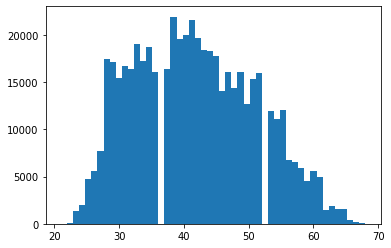

In [43]:
plt.hist(x='idade',bins=50,data=consolidado)
plt.show()

## **Tarefa 03 - Bivariada** ##

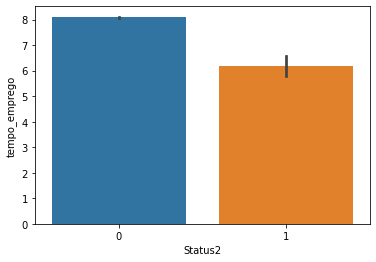

In [24]:
#Terceira atividade
sns.barplot(data=consolidado, x="Status2", y="tempo_emprego")

 * Quanto maior o tempo de emprego menor a chance de inadimplencia. 

* ### Modelagem 

In [25]:
x=consolidado.drop(columns=['STATUS','Status2']).values
y=consolidado['Status2'].astype(int)
y.value_counts()
#Antes que incluir os dados no modelo é necessario balancear para que o modelo não fique enviesado

0    530317
1       821
Name: Status2, dtype: int64

In [26]:
#Balanceando as classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(x,y)


In [27]:
y_resampled.value_counts()

0    821
1    821
Name: Status2, dtype: int64

In [28]:
novo=MinMaxScaler()
X=novo.fit_transform(X_resampled)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y_resampled,test_size=0.2,random_state=42)


In [30]:
clf=GradientBoostingClassifier(criterion='squared_error',n_estimators=1000,random_state=42)
modelo1=clf.fit(X_train,y_train)


In [31]:
y_pred=modelo1.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.939209726443769
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       185
           1       0.89      0.98      0.93       144

    accuracy                           0.94       329
   macro avg       0.94      0.94      0.94       329
weighted avg       0.94      0.94      0.94       329



In [32]:
arvore_decisao=DecisionTreeClassifier()
modelo2=arvore_decisao.fit(X_train,y_train)
y_arvore=modelo2.predict(X_test)
print(accuracy_score(y_test,y_arvore))
print(classification_report(y_test,y_arvore))

0.9483282674772037
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       185
           1       0.91      0.98      0.94       144

    accuracy                           0.95       329
   macro avg       0.95      0.95      0.95       329
weighted avg       0.95      0.95      0.95       329



In [33]:
ada=AdaBoostClassifier(algorithm='SAMME',n_estimators=1000,random_state=42)
modelo3=ada.fit(X_train,y_train)
ada_pred=modelo3.predict(X_test)
print(accuracy_score(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.8237082066869301
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       185
           1       0.78      0.83      0.81       144

    accuracy                           0.82       329
   macro avg       0.82      0.82      0.82       329
weighted avg       0.83      0.82      0.82       329



In [45]:
rf=RandomForestClassifier(random_state=42,n_estimators=3)
modelo5=rf.fit(X_train,y_train)
rf_pred=modelo5.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.9422492401215805
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       185
           1       0.91      0.96      0.94       144

    accuracy                           0.94       329
   macro avg       0.94      0.94      0.94       329
weighted avg       0.94      0.94      0.94       329



### **Tarefa 04 - Bivariada**

In [34]:
rf=RandomForestClassifier(random_state=42,max_depth=30,n_estimators=1000)
modelo5=rf.fit(X_train,y_train)
rf_pred=modelo5.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

0.9817629179331308
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       185
           1       0.98      0.98      0.98       144

    accuracy                           0.98       329
   macro avg       0.98      0.98      0.98       329
weighted avg       0.98      0.98      0.98       329

